<a href="https://colab.research.google.com/github/koci1005/c-programming/blob/main/Liver%20Cancer%20Classifier%20Detection%20(CSV%20Data)%20by%20ML%20and%20deep%20learning%20ANN%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorFlow
- TensorFlow library for AI
- Keras – High-Level TensorFlow API
- Getting started with TensorFlow
- Installation and setting up TensorFlow
- TensorFlow Data Structures
- TensorBoard—Visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

#Chrnoic Kidney Disease Prediction - Using Machine Learning and deep learning

Chronic Kidney Disease (CKD) or chronic renal disease has become a major issue with a steady growth rate. A person can only survive without kidneys for an average time of 18 days, which makes a huge demand for a kidney transplant and Dialysis. It is important to have effective methods for early prediction of CKD. Machine learning methods are effective in CKD prediction. This work proposes a workflow to predict CKD status based on clinical data, incorporating data prepossessing, a missing value handling method with collaborative filtering and attributes selection. Out of the 11 machine learning methods considered, the extra tree classifier and random forest classifier are shown to result in the highest accuracy and minimal bias to the attributes. The research also considers the practical aspects of data collection and highlights the importance of incorporating domain knowledge when using machine learning for CKD status prediction.

![image.png](https://www.healio.com/~/media/slack-news/stock-images/rheumatology/rheum-images/kidney.jpeg)

# Data set we contains

1. age - age
2. bp - blood pressure
3. sg - specific gravity
4. al - albumin
5. su - sugar
6. rbc - red blood cells
7. pc - pus cell
8. pcc - pus cell clumps
9. ba - bacteria
10. bgr - blood glucose random
11. bu - blood urea
12. sc - serum creatinine
13. sod - sodium
14. pot - potassium
15. hemo - haemoglobin
16. pcv - packed cell volume
17. wc - white blood cell count
18. rc - red blood cell count
19. htn - hypertension
20. dm - diabetes mellitus
21. cad - coronary artery disease
22. appet - appetite
23. pe - pedal edema
24. ane - anemia
25. lassification - class

# Feature description of the Data

1. Age(numerical) --> age in years
2. Blood Pressure(numerical) bp in mm/Hg
3. Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
4. Albumin(nominal)al - (0,1,2,3,4,5)
5. Sugar(nominal) su - (0,1,2,3,4,5)
6. Red Blood Cells(nominal) rbc - (normal,abnormal)
7. Pus Cell (nominal)pc - (normal,abnormal)
8. Pus Cell clumps(nominal)pcc - (present,notpresent)
9. Bacteria(nominal) ba - (present,notpresent)
10. Blood Glucose Random(numerical) bgr in mgs/dl
11. Blood Urea(numerical) bu in mgs/dl
12. Serum Creatinine(numerical) sc in mgs/dl
13. Sodium(numerical) sod in mEq/L
14. Potassium(numerical) pot in mEq/L
15. Haemoglobin(numerical) hemo in gms
16. Packed Cell Volume(numerical)
17. White Blood Cell Count(numerical) wc in cells/cumm
18. Red Blood Cell Count(numerical) rc in millions/cmm
19. Hypertension(nominal) htn - (yes,no)
20. Diabetes Mellitus(nominal) dm - (yes,no)
21. Coronary Artery Disease(nominal) cad - (yes,no)
22. Appetite(nominal) ppet - (good,poor)
23. Pedal Edema(nominal) pe - (yes,no)
24. Anemia(nominal)ane - (yes,no)
25. Class (nominal) class - (ckd,notckd)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Install & Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import seaborn as sns
import matplotlib.pyplot as plt

kidney = pd.read_csv("/content/drive/MyDrive/Spring 2025 Course Deep Learning/11th class/kidney_disease.csv")

In [ ]:
kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
kidney.shape

(400, 26)

In [ ]:
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


#### Performing Exploitory Data Analysis ( EDA )
Modifying the Column Names as per our requirements

In [ ]:
def convert_dtype(kidney,feature):
    kidney[feature]=pd.to_numeric(kidney[feature],errors='coerce')    #whereever we have Nan values , this errors parameter will hanfle that

# Data set we contains

1. age - age
2. bp - blood pressure
3. sg - specific gravity
4. al - albumin
5. su - sugar
6. rbc - red blood cells
7. pc - pus cell
8. pcc - pus cell clumps
9. ba - bacteria
10. bgr - blood glucose random
11. bu - blood urea
12. sc - serum creatinine
13. sod - sodium
14. pot - potassium
15. hemo - haemoglobin
16. pcv - packed cell volume
17. wc - white blood cell count
18. rc - red blood cell count
19. htn - hypertension
20. dm - diabetes mellitus
21. cad - coronary artery disease
22. appet - appetite
23. pe - pedal edema
24. ane - anemia
25. lassification - class

# Feature description of the Data

1. Age(numerical) --> age in years
2. Blood Pressure(numerical) bp in mm/Hg
3. Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
4. Albumin(nominal)al - (0,1,2,3,4,5)
5. Sugar(nominal) su - (0,1,2,3,4,5)
6. Red Blood Cells(nominal) rbc - (normal,abnormal)
7. Pus Cell (nominal)pc - (normal,abnormal)
8. Pus Cell clumps(nominal)pcc - (present,notpresent)
9. Bacteria(nominal) ba - (present,notpresent)
10. Blood Glucose Random(numerical) bgr in mgs/dl
11. Blood Urea(numerical) bu in mgs/dl
12. Serum Creatinine(numerical) sc in mgs/dl
13. Sodium(numerical) sod in mEq/L
14. Potassium(numerical) pot in mEq/L
15. Haemoglobin(numerical) hemo in gms
16. Packed Cell Volume(numerical)
17. White Blood Cell Count(numerical) wc in cells/cumm
18. Red Blood Cell Count(numerical) rc in millions/cmm
19. Hypertension(nominal) htn - (yes,no)
20. Diabetes Mellitus(nominal) dm - (yes,no)
21. Coronary Artery Disease(nominal) cad - (yes,no)
22. Appetite(nominal) ppet - (good,poor)
23. Pedal Edema(nominal) pe - (yes,no)
24. Anemia(nominal)ane - (yes,no)
25. Class (nominal) class - (ckd,notckd)

In [ ]:
features=['pcv','wc','rc']
for i in features:
    convert_dtype(kidney,i)

In [ ]:
kidney.dtypes

,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


In [ ]:
kidney.drop(['id', 'age'], inplace=True, axis=1)

In [ ]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              388 non-null    float64
 1   sg              353 non-null    float64
 2   al              354 non-null    float64
 3   su              351 non-null    float64
 4   rbc             248 non-null    object 
 5   pc              335 non-null    object 
 6   pcc             396 non-null    object 
 7   ba              396 non-null    object 
 8   bgr             356 non-null    float64
 9   bu              381 non-null    float64
 10  sc              383 non-null    float64
 11  sod             313 non-null    float64
 12  pot             312 non-null    float64
 13  hemo            348 non-null    float64
 14  pcv             329 non-null    float64
 15  wc              294 non-null    float64
 16  rc              269 non-null    float64
 17  htn             398 non-null    obj

# Performing Data cleaning

In [ ]:
def extract_cat_num(kidney):
    cat_col=[col for col in kidney.columns if kidney[col].dtype=='O']
    num_col=[col for col in kidney.columns if kidney[col].dtype!='O']
    return cat_col,num_col

In [ ]:
cat_col,num_col=extract_cat_num(kidney)

In [ ]:
cat_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [ ]:
# dirtiness in categorical data
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

rbc has [nan 'normal' 'abnormal'] values


pc has ['normal' 'abnormal' nan] values


pcc has ['notpresent' 'present' nan] values


ba has ['notpresent' 'present' nan] values


htn has ['yes' 'no' nan] values


dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


cad has ['no' 'yes' '\tno' nan] values


appet has ['good' 'poor' nan] values


pe has ['no' 'yes' nan] values


ane has ['no' 'yes' nan] values


classification has ['ckd' 'ckd\t' 'notckd'] values




In [ ]:
num_col

['bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [ ]:
for col in num_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

bp has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] values


sg has [1.02  1.01  1.005 1.015   nan 1.025] values


al has [ 1.  4.  2.  3.  0. nan  5.] values


su has [ 0.  3.  4.  1. nan  2.  5.] values


bgr has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 297. 233. 294. 323. 125.  90.
 308. 118. 224. 128. 122. 214. 213. 268. 256.  84. 105. 288. 139.  78.
 273. 242. 424. 303. 148. 160. 192. 307. 220. 447. 309.  22. 111. 261.
 215. 234. 131. 352.  80. 239. 110. 130. 184. 252. 113. 230. 341. 255.
 103. 238. 248. 120. 241. 269. 201. 203. 463. 176.  82. 119.  97.  96.
  81. 116. 134.  85.  83.  87.  75.] values


bu has [ 36.   18

In [ ]:
kidney['dm'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)
kidney['cad'].replace(to_replace={'\tno':'no'},inplace=True)
kidney['classification'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

<ipython-input-20-396b339249a4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kidney['dm'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)
<ipython-input-20-396b339249a4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [ ]:
# no dirtiness
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

rbc has [nan 'normal' 'abnormal'] values


pc has ['normal' 'abnormal' nan] values


pcc has ['notpresent' 'present' nan] values


ba has ['notpresent' 'present' nan] values


htn has ['yes' 'no' nan] values


dm has ['yes' 'no' ' yes' nan] values


cad has ['no' 'yes' nan] values


appet has ['good' 'poor' nan] values


pe has ['no' 'yes' nan] values


ane has ['no' 'yes' nan] values


classification has ['ckd' 'notckd'] values




# Analysing distribution of each and every column

In [ ]:
len(num_col)

13

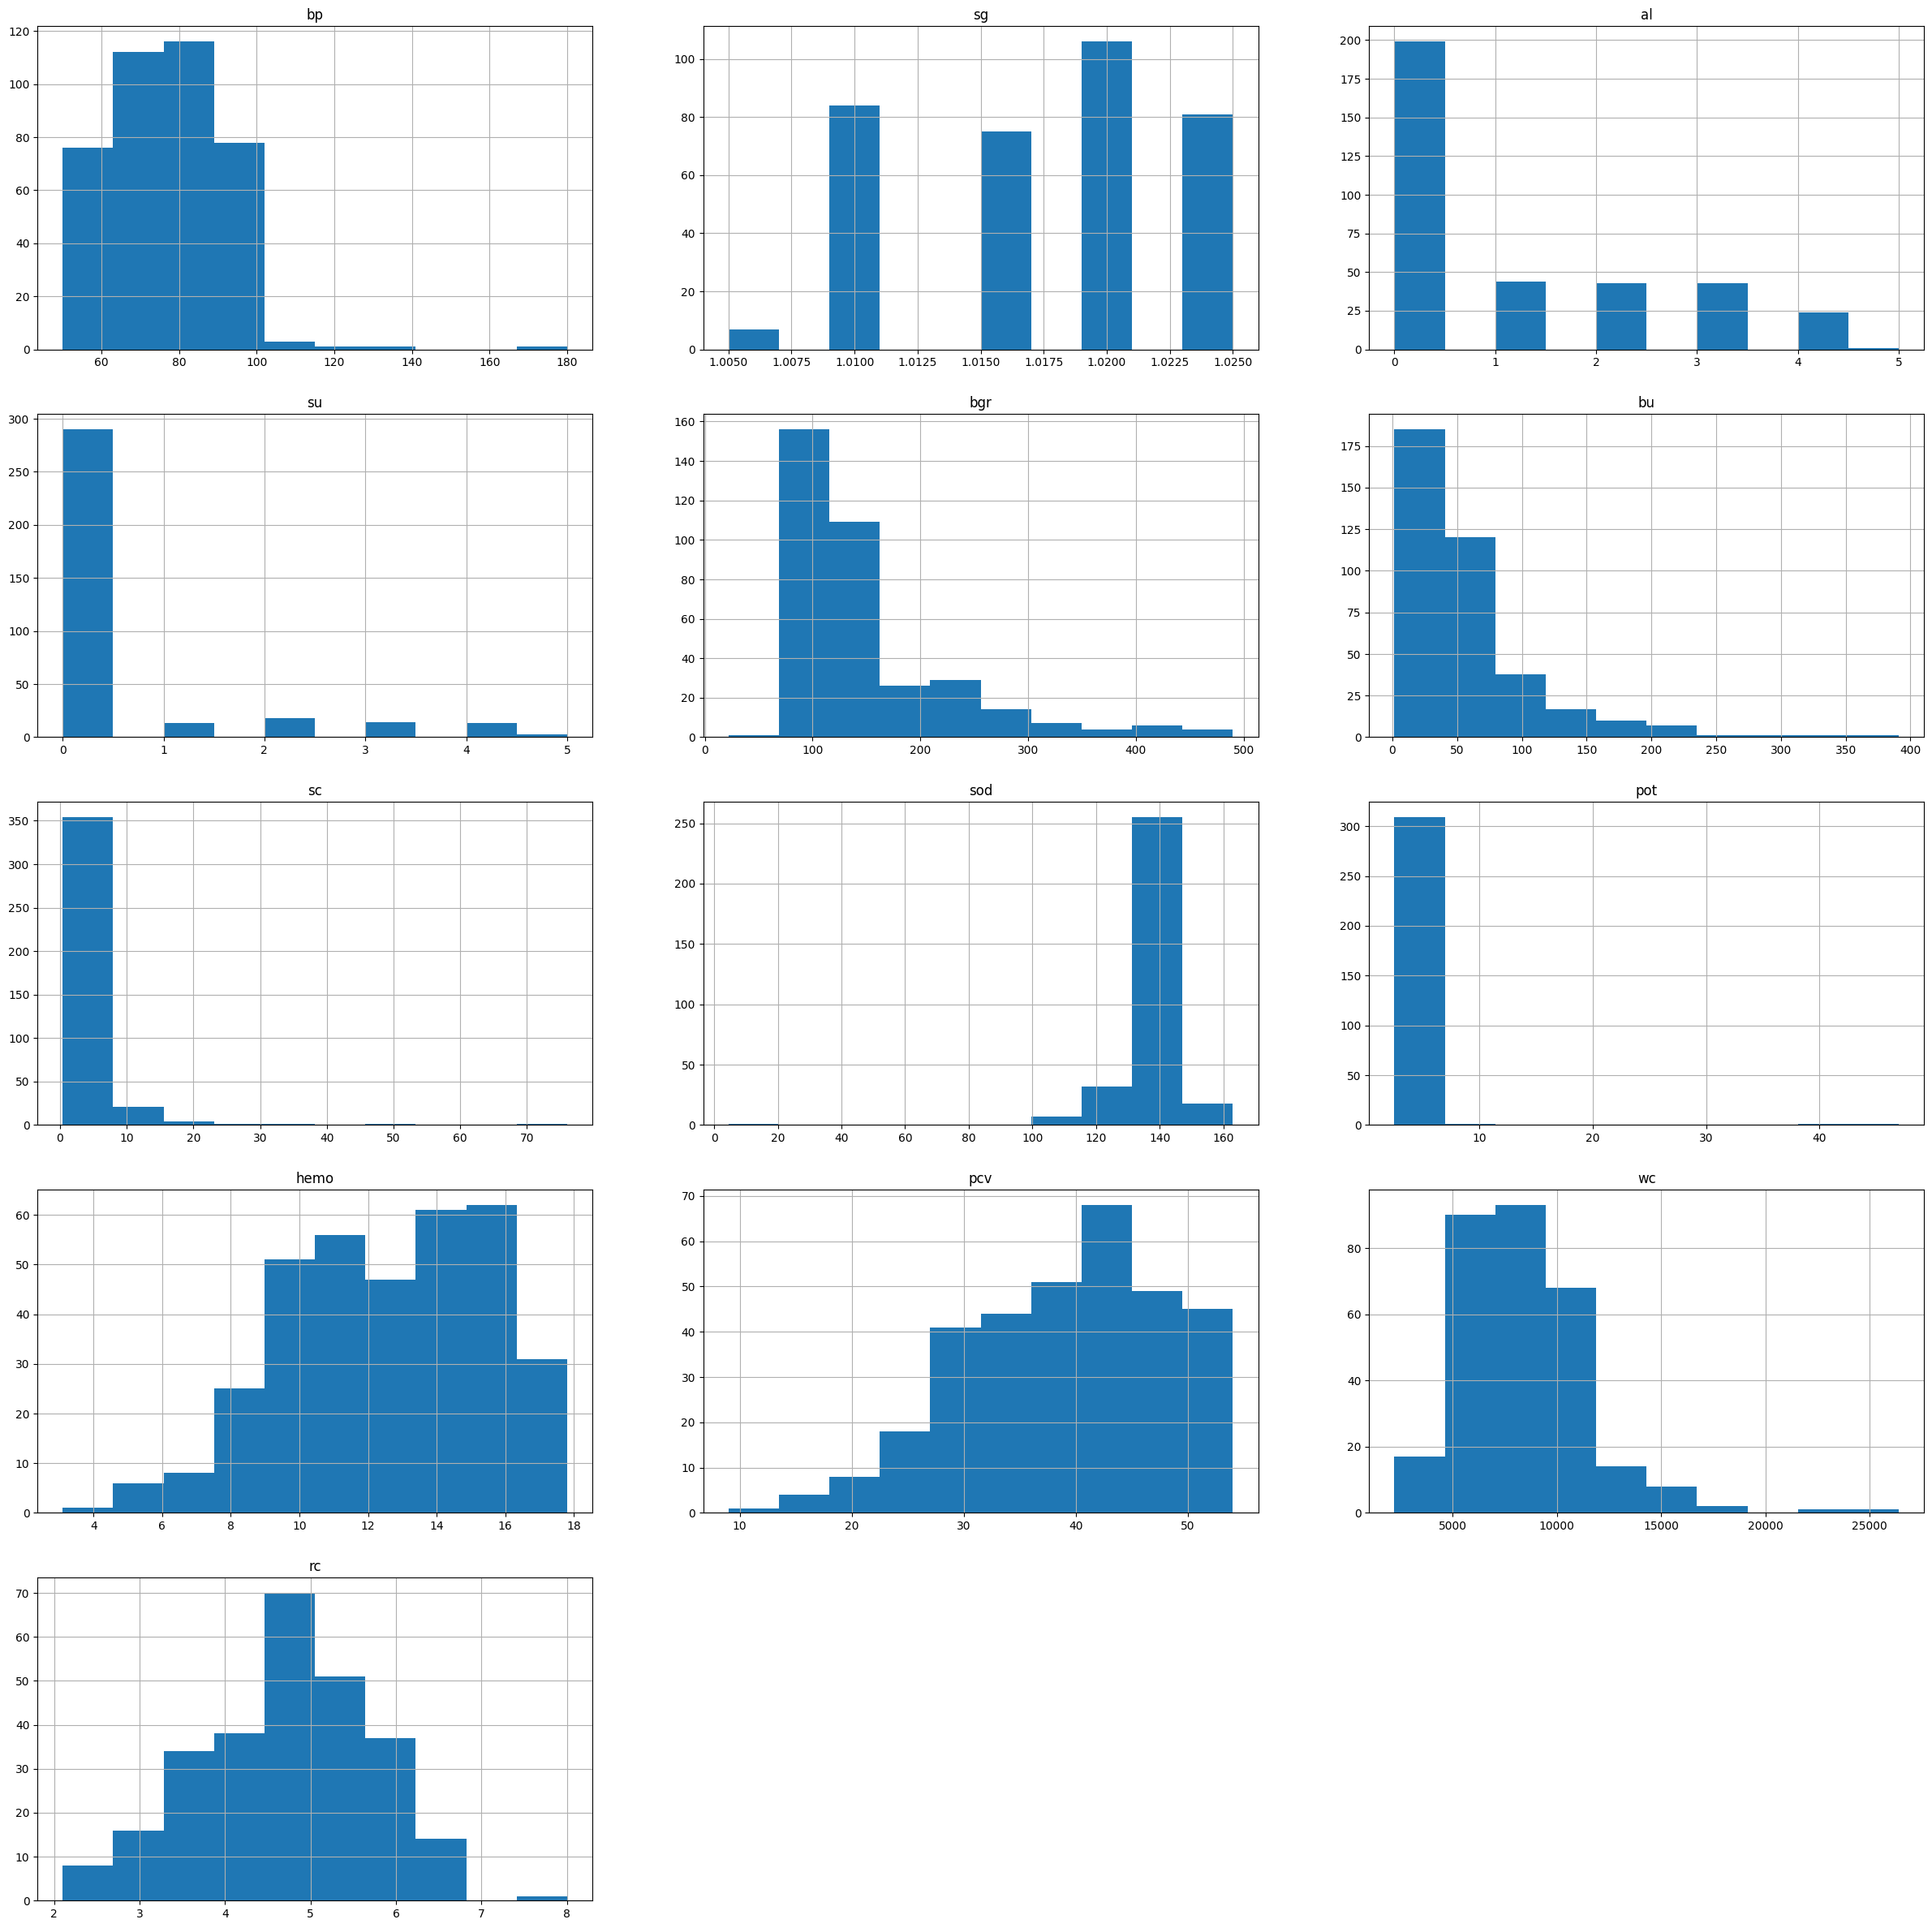

In [ ]:
plt.figure(figsize=(30,30))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)   # 5 rows and 3 columns
    kidney[feature].hist()
    plt.title(feature)

# Check Label distribution of categorical Data

In [ ]:
len(cat_col)

11

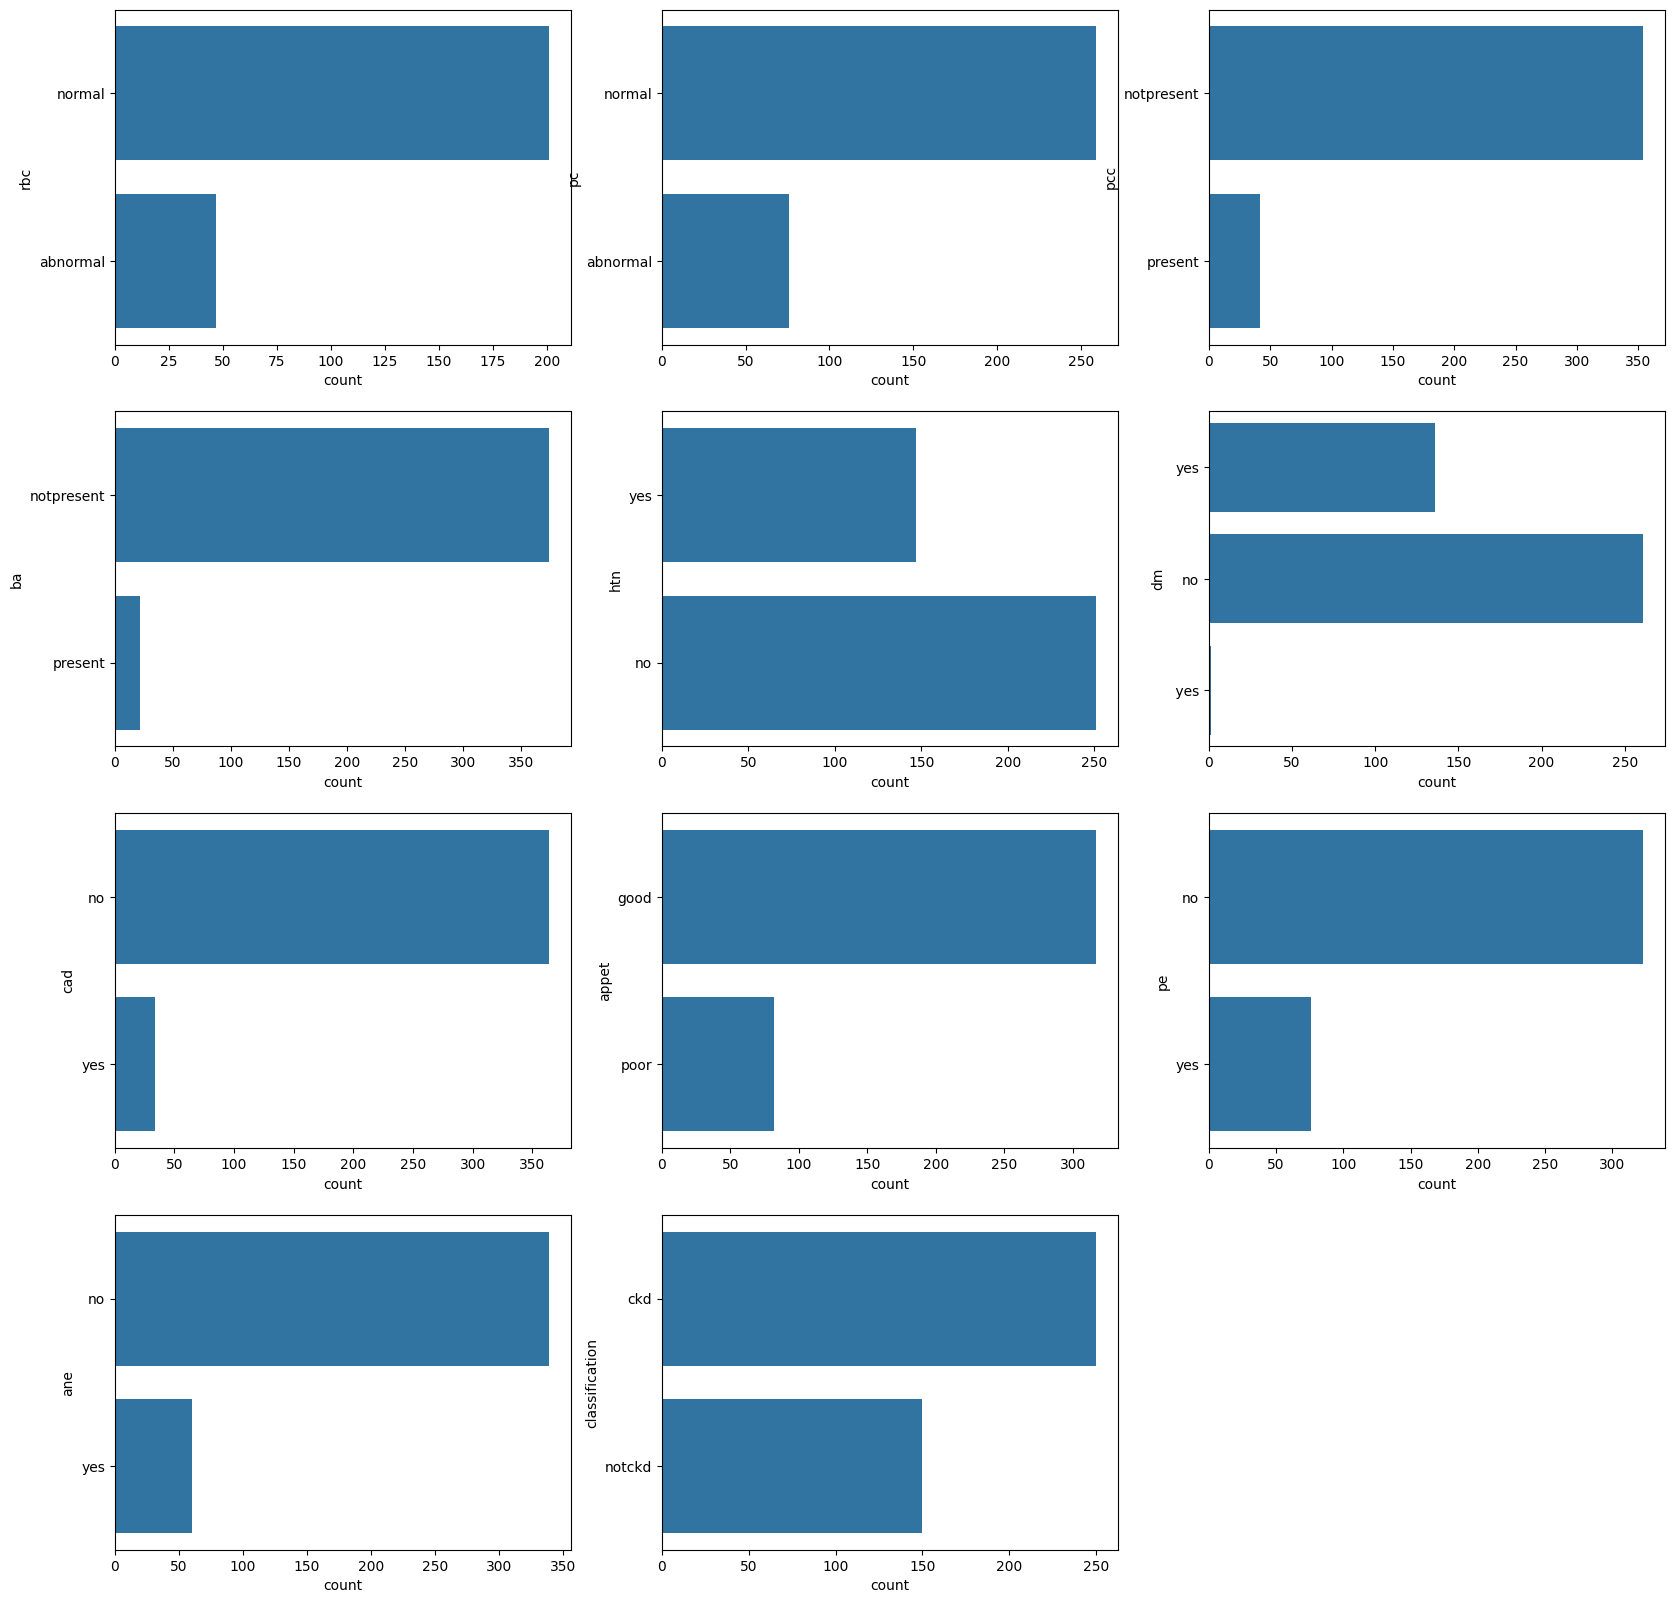

In [ ]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(kidney[feature])

In [ ]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              388 non-null    float64
 1   sg              353 non-null    float64
 2   al              354 non-null    float64
 3   su              351 non-null    float64
 4   rbc             248 non-null    object 
 5   pc              335 non-null    object 
 6   pcc             396 non-null    object 
 7   ba              396 non-null    object 
 8   bgr             356 non-null    float64
 9   bu              381 non-null    float64
 10  sc              383 non-null    float64
 11  sod             313 non-null    float64
 12  pot             312 non-null    float64
 13  hemo            348 non-null    float64
 14  pcv             329 non-null    float64
 15  wc              294 non-null    float64
 16  rc              269 non-null    float64
 17  htn             398 non-null    obj

In [ ]:
cat_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

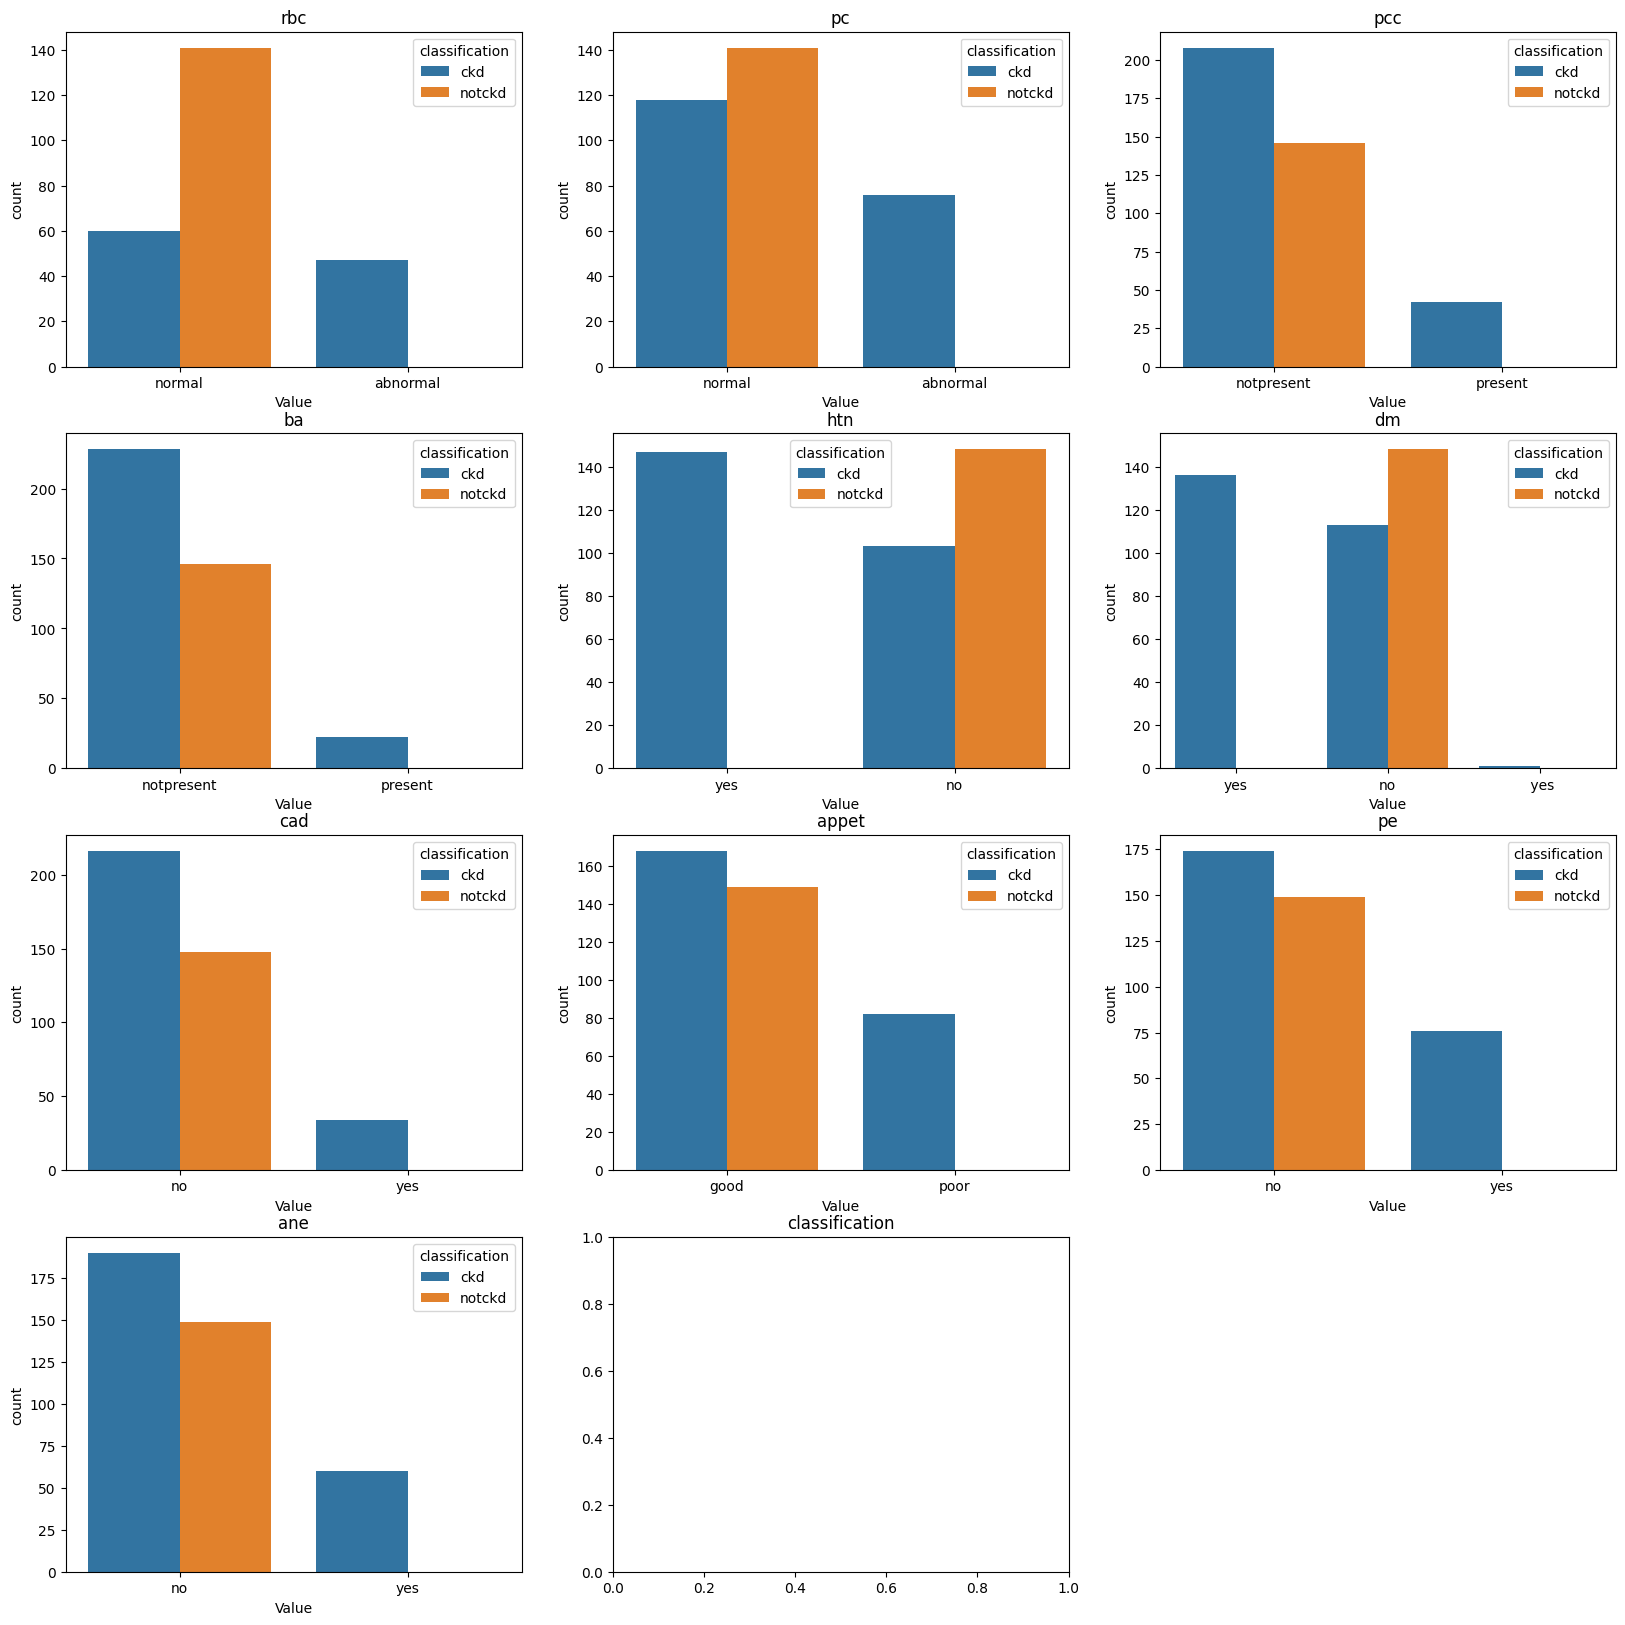

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code) ...

plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    # Reshape data into long-form using melt
    melted_data = pd.melt(kidney, id_vars=['classification'], value_vars=[feature], var_name='Feature', value_name='Value')
    # Plot using the melted data
    sns.countplot(x='Value', hue='classification', data=melted_data)
    plt.title(feature)

plt.show()

<Axes: xlabel='count', ylabel='classification'>

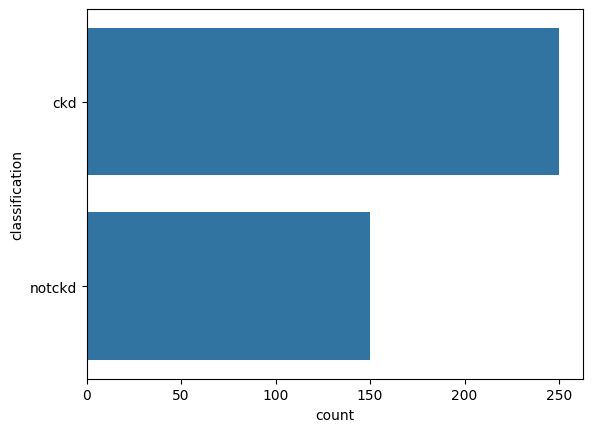

In [ ]:
sns.countplot(kidney['classification'])

In [ ]:
kidney['classification'].value_counts()

,count
classification,
ckd,250
notckd,150


# Correlation between features

In [ ]:
kidney.corr(numeric_only=True)

,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
bp,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
sg,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
al,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
su,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
bgr,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
bu,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
sc,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sod,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
pot,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309
hemo,-0.306540,0.602582,-0.634632,-0.224775,-0.306189,-0.610360,-0.401670,0.365183,-0.133746,1.000000,0.895382,-0.169413,0.798880


<Axes: >

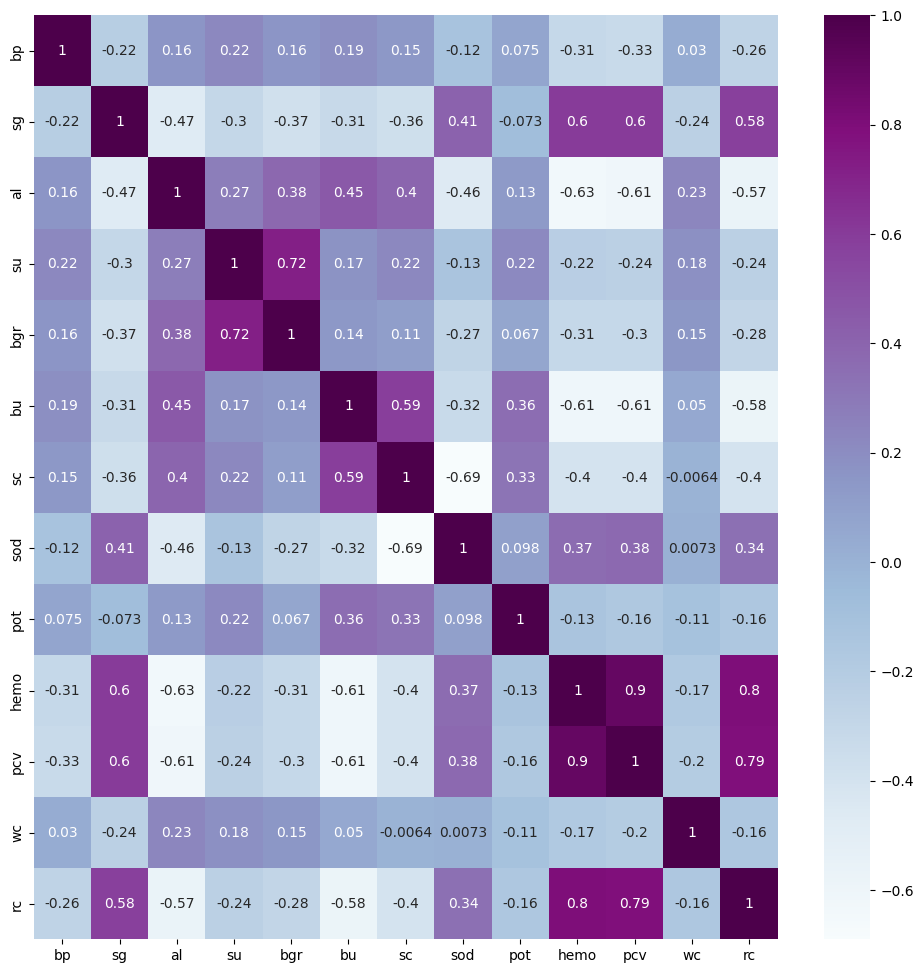

In [ ]:
plt.figure(figsize=(12,12))
# Select only numerical columns for correlation calculation
numerical_kidney = kidney.select_dtypes(include=np.number)
sns.heatmap(numerical_kidney.corr(method='pearson'),cbar=True,cmap='BuPu',annot=True)

* Rbc count is positively correlated with specific gravity,haemoglobin,packed cell volume
* Rbc count is negatively correlated with albumin, blood urea
* Packed cell volume and haemoglobin are highly positive correlated
* Packed cell volume is negatively correlated with albumin and blood urea
* haemoglobin and albumin are negatively correlated

In [ ]:
kidney.groupby(['rbc','classification'])['rc'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
rbc      classification                                   
abnormal ckd                25  3.832000     3.7  2.5  5.6
normal   ckd                40  3.782500     3.8  2.1  8.0
         notckd            134  5.368657     5.3  4.4  6.5

We can observe that when a person is not diseased its rbc count is 134, mean is also high whereas when he is diseased count drop downs to 25-40 and mean is low.

#### Relationship between haemoglobin and packed cell volume

Text(0.5, 1.0, 'Relationship between haemoglobin and packed cell volume')

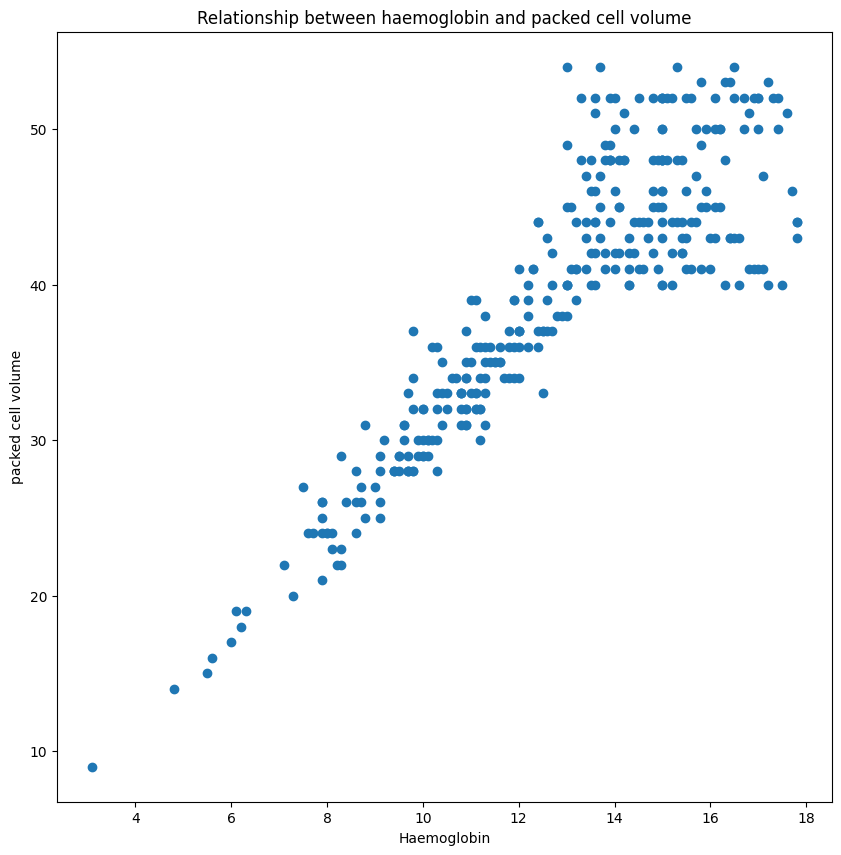

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=kidney.hemo,y=kidney['pcv'])
plt.xlabel('Haemoglobin')
plt.ylabel('packed cell volume')
plt.title('Relationship between haemoglobin and packed cell volume')

We can see that there is a linear relationship between haemoglobin and pacled cell volume

## Analyse distribution of red blood cell count chronic as well as non chronic

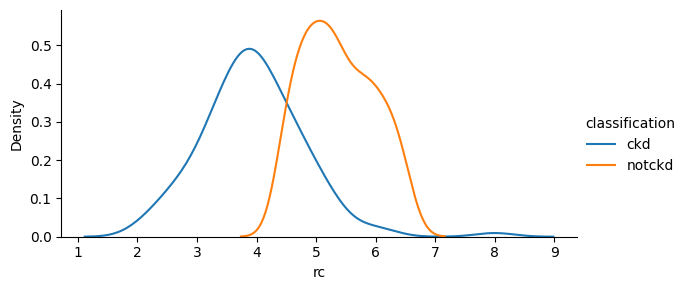

In [ ]:
grid=sns.FacetGrid(kidney,hue='classification',aspect=2)
grid.map(sns.kdeplot,'rc')
grid.add_legend()

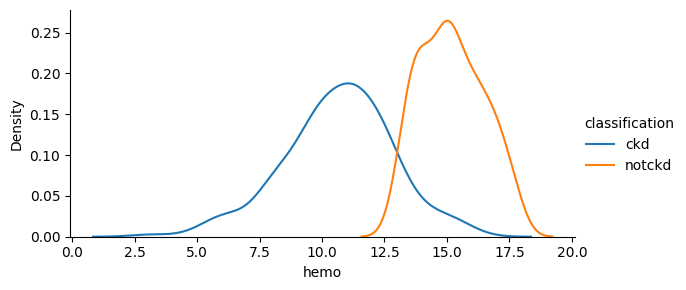

In [ ]:
grid=sns.FacetGrid(kidney,hue='classification',aspect=2)
grid.map(sns.kdeplot,'hemo')
grid.add_legend()

Text(0.5, 1.0, 'Relationship between red blood cell count and packed cell volume')

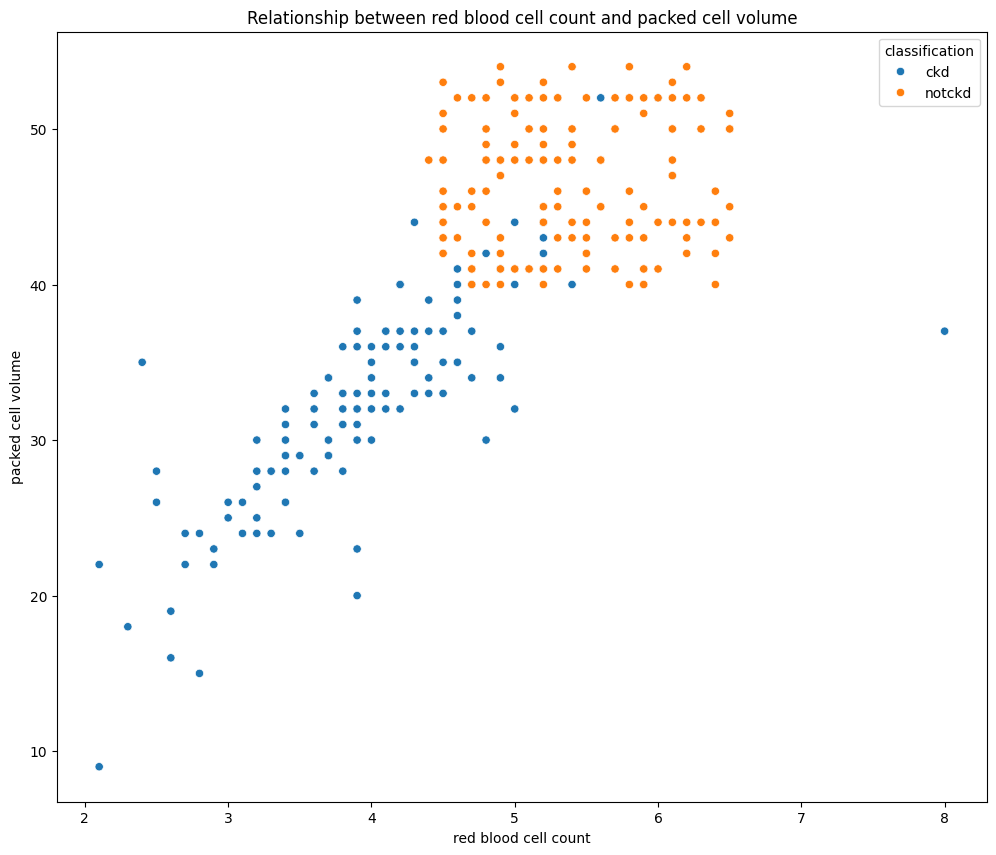

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=kidney['rc'],y=kidney['pcv'],hue=kidney['classification'])
plt.xlabel('red blood cell count')
plt.ylabel('packed cell volume')
plt.title('Relationship between red blood cell count and packed cell volume')

Text(0.5, 1.0, 'Relationship between haemoglobin and red blood cell count')

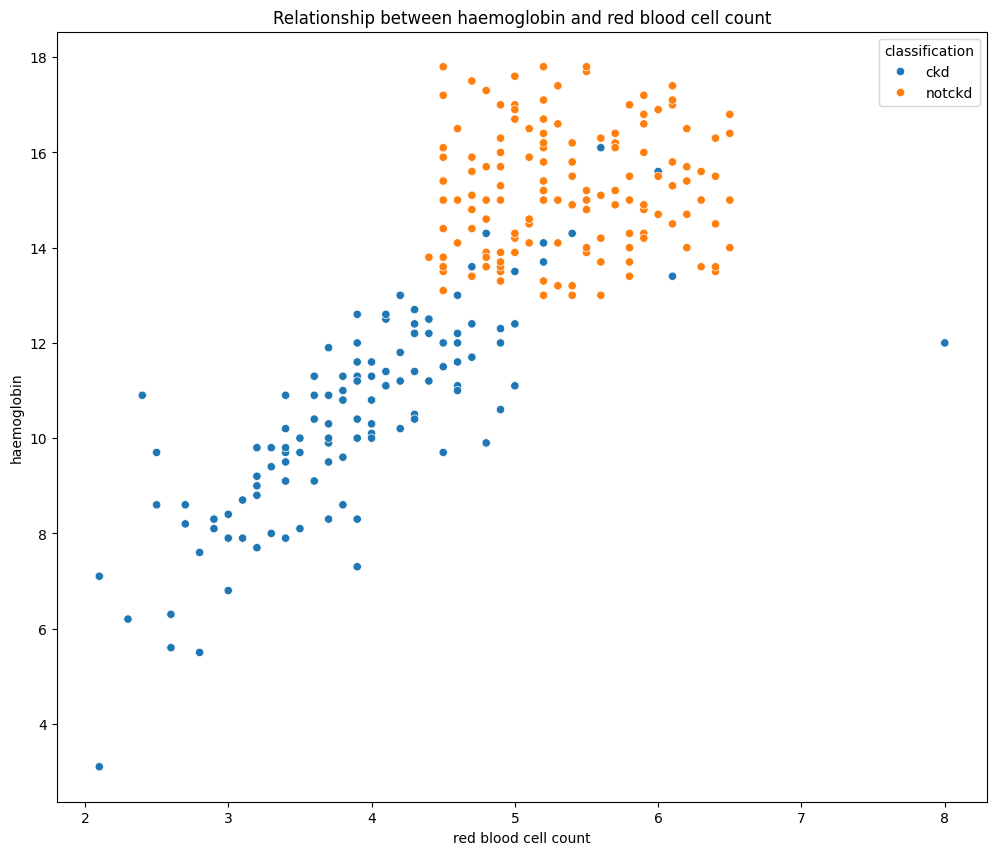

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=kidney['rc'],y=kidney['hemo'],hue=kidney['classification'])
plt.xlabel('red blood cell count')
plt.ylabel('haemoglobin')
plt.title('Relationship between haemoglobin and red blood cell count')

We can see that there is some kind of linearity in all the relationships
Whenever haemoglobin is below 13-14 he is positive for chronic disease , Whenever haemoglobin is near 18 he is negative

## Handling Missing Values

In [ ]:
kidney.isnull().sum()

,0
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44
bu,19


In [ ]:
kidney.isnull().sum().sort_values(ascending=False)

,0
rbc,152
rc,131
wc,106
pot,88
sod,87
pcv,71
pc,65
hemo,52
su,49
sg,47


We can fill this missing values with mean,median or std deviat

In [ ]:
kidney.describe()

,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


<Axes: xlabel='classification', ylabel='bp'>

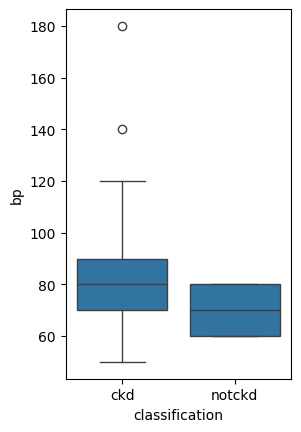

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(x=kidney['classification'],y=kidney['bp'])

In [ ]:
num_col

['bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [ ]:
cat_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [ ]:
list(enumerate(cat_col))

[(0, 'rbc'),
 (1, 'pc'),
 (2, 'pcc'),
 (3, 'ba'),
 (4, 'htn'),
 (5, 'dm'),
 (6, 'cad'),
 (7, 'appet'),
 (8, 'pe'),
 (9, 'ane'),
 (10, 'classification')]

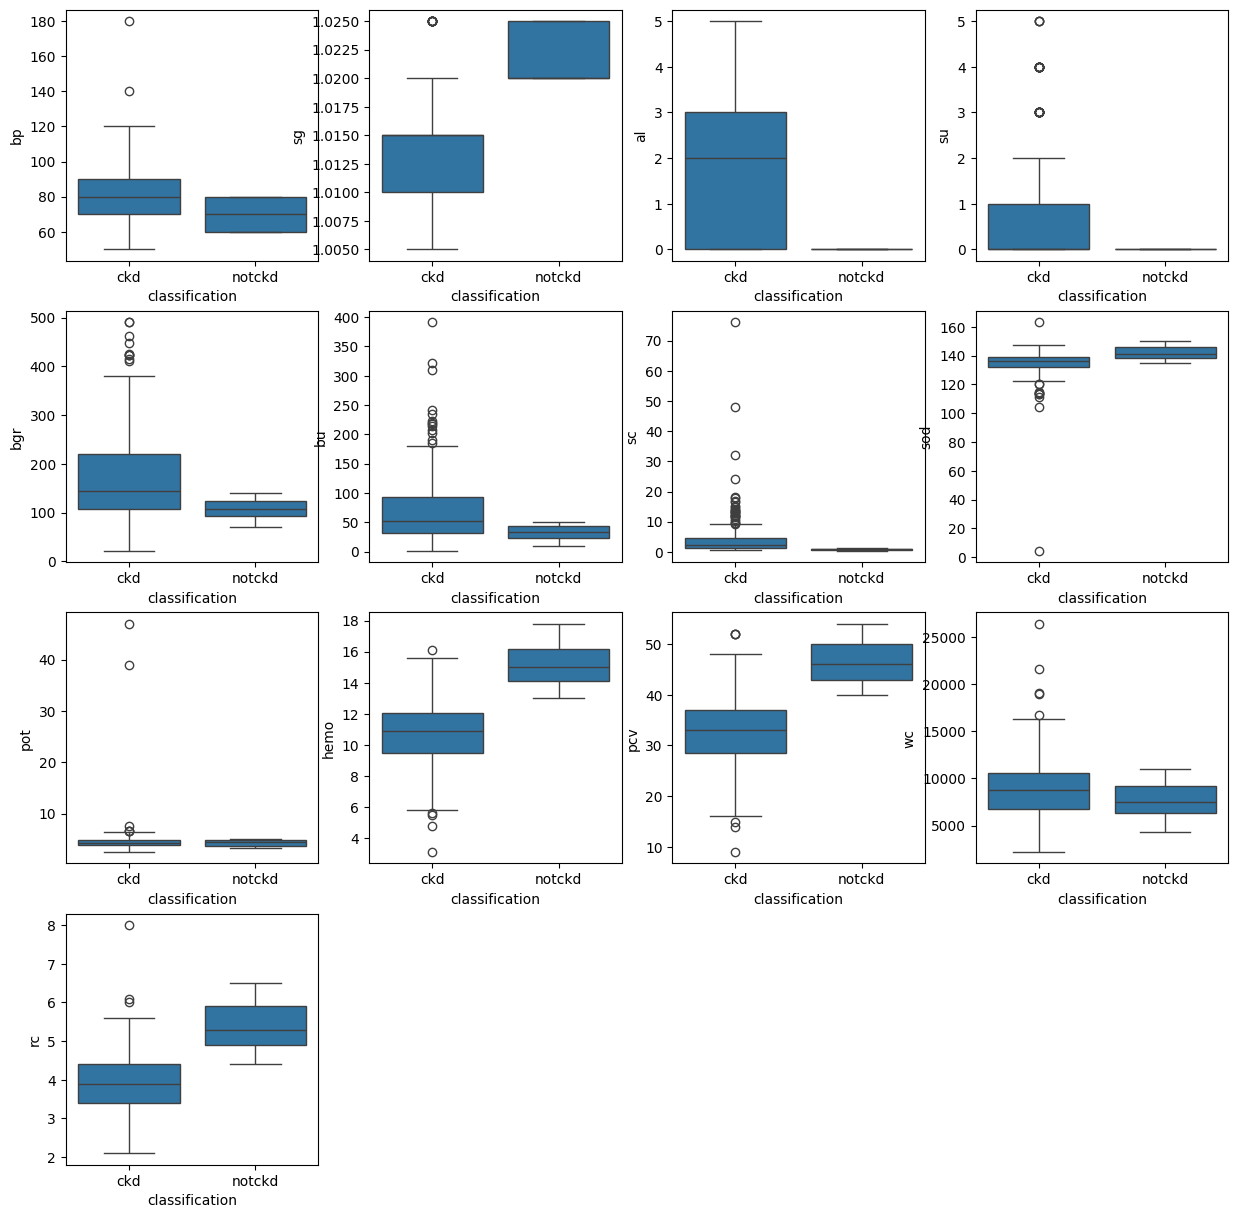

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(num_col):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=kidney['classification'],y=i[1],data=kidney.reset_index())

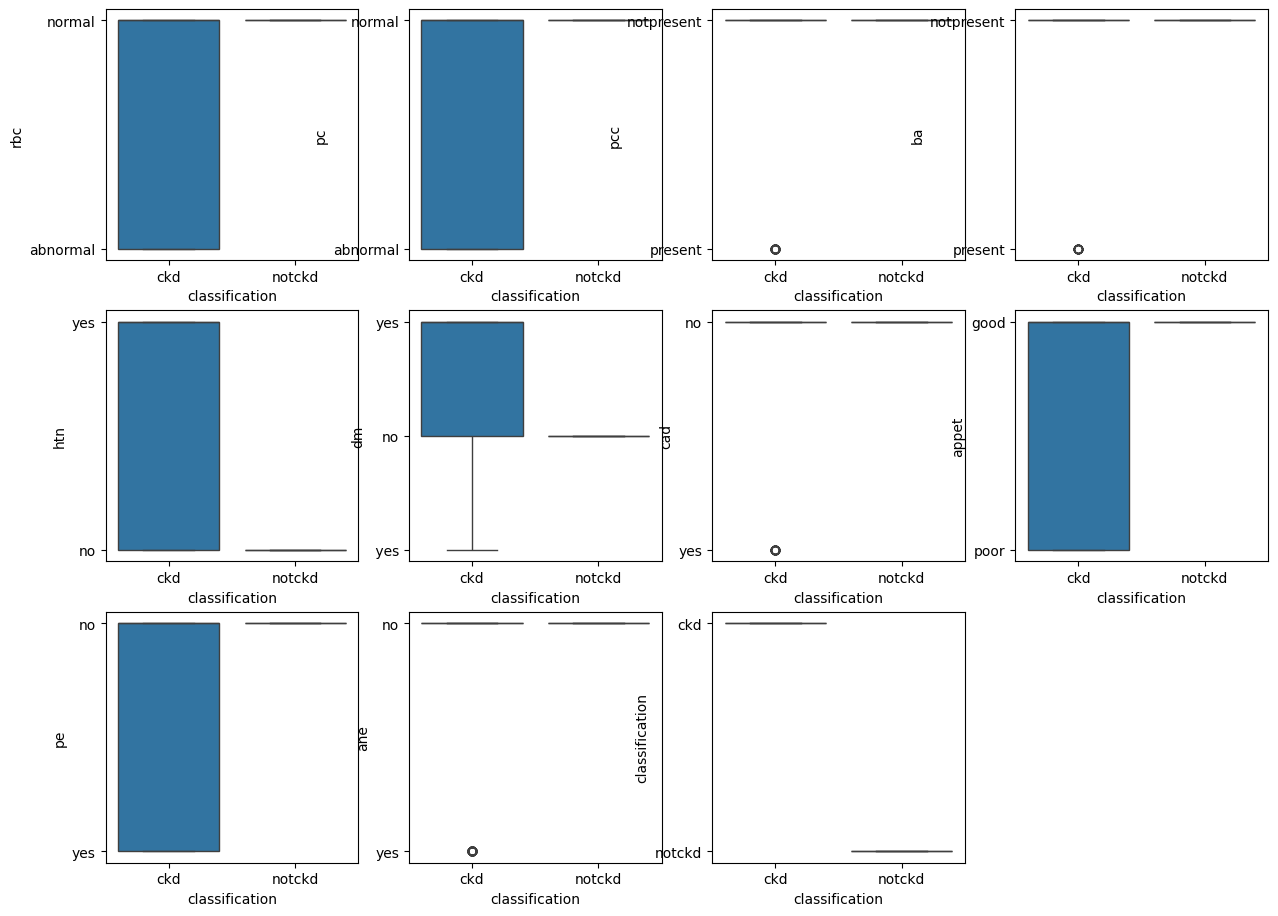

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(cat_col):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=kidney['classification'],y=i[1],data=kidney.reset_index())

here are outliers in dataset so filling missing values with mean is not feasible , i will use median to fill missing values

In [ ]:
for i in num_col:
    kidney[i].fillna(kidney[i].median(),inplace=True)

<ipython-input-50-b467229cda49>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kidney[i].fillna(kidney[i].median(),inplace=True)


In [ ]:
kidney.isnull().sum()

,0
bp,0
sg,0
al,0
su,0
rbc,152
pc,65
pcc,4
ba,4
bgr,0
bu,0


In [ ]:
kidney.describe()

,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750
std,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439
min,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000
25%,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000
50%,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000
75%,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000
max,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000


## Filling missing values in categorical columns using random values

It was more important to find the missing values and need to clean thos emissing values by using different menthods. ( I've dropped the NULL Values ). Missing Values leads to False Output and sometimes cause many Problems while Evaluating our Model.

In [ ]:
kidney.isnull().sum()

,0
bp,0
sg,0
al,0
su,0
rbc,152
pc,65
pcc,4
ba,4
bgr,0
bu,0


In [ ]:
kidney['rbc'].isnull().sum()

np.int64(152)

In [ ]:
random_sample=kidney['rbc'].dropna().sample(152)

In [ ]:
random_sample

,rbc
308,normal
379,normal
161,abnormal
255,normal
293,normal
...,...
329,normal
320,normal
187,normal
103,normal


In [ ]:
kidney[kidney['rbc'].isnull()].index

Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
       ...
       245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
      dtype='int64', length=152)

In [ ]:
random_sample.index

Index([308, 379, 161, 255, 293, 250, 258, 321, 257, 383,
       ...
       256, 226, 312, 242, 260, 329, 320, 187, 103, 363],
      dtype='int64', length=152)

We can see that indexes are different , while putting random values indexes must be equal

In [ ]:
random_sample.index=kidney[kidney['rbc'].isnull()].index    #in this way index will be equal

In [ ]:
kidney.loc[kidney['rbc'].isnull(),'rbc']=random_sample

In [ ]:
kidney.isnull().sum()

,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,65
pcc,4
ba,4
bgr,0
bu,0


In [ ]:
random_sample=kidney['pc'].dropna().sample(65)

In [ ]:
random_sample

,pc
380,normal
346,normal
102,normal
199,normal
256,normal
...,...
62,normal
297,normal
192,normal
167,normal


In [ ]:
random_sample.index=kidney[kidney['pc'].isnull()].index

In [ ]:
kidney.loc[kidney['pc'].isnull(),'pc']=random_sample

In [ ]:
kidney.isnull().sum()

,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,4
ba,4
bgr,0
bu,0


In [ ]:
random_sample=kidney['pcc'].dropna().sample(4)

In [ ]:
random_sample.index=kidney[kidney['pcc'].isnull()].index

In [ ]:
kidney.loc[kidney['pcc'].isnull(),'pcc']=random_sample

In [ ]:
kidney.isnull().sum()

,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,4
bgr,0
bu,0


In [ ]:
random_sample=kidney['ba'].dropna().sample(4)
random_sample.index=kidney[kidney['ba'].isnull()].index
kidney.loc[kidney['ba'].isnull(),'ba']=random_sample
kidney.isnull().sum()

,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0
bu,0


In [ ]:
def fill_missing_with_random_sample(df, column_name):
    """
    Fills missing values in a specified column of a DataFrame with random samples
    from the non-missing values in that column.

    Args:
        df: The input DataFrame.
        column_name: The name of the column to fill missing values in.
    """
    random_sample = df[column_name].dropna().sample(df[column_name].isnull().sum())
    random_sample.index = df[df[column_name].isnull()].index
    df.loc[df[column_name].isnull(), column_name] = random_sample
    return df


In [ ]:
fill_missing_with_random_sample(kidney,'htn')

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [ ]:
kidney.isnull().sum()

,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0
bu,0


In [ ]:
fill_missing_with_random_sample(kidney,'dm')

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [ ]:
fill_missing_with_random_sample(kidney,'cad')

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [ ]:
fill_missing_with_random_sample(kidney,'appet')

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [ ]:
fill_missing_with_random_sample(kidney,'pe')
fill_missing_with_random_sample(kidney,'ane')

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [ ]:
kidney.isnull().sum()

,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0
bu,0


In [ ]:
kidney.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


<Axes: xlabel='count', ylabel='rbc'>

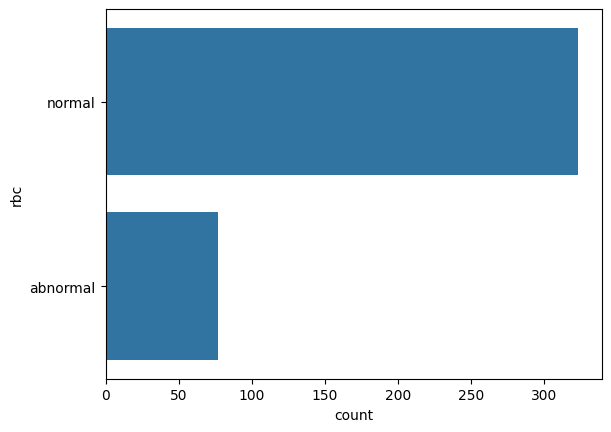

In [ ]:
sns.countplot(kidney['rbc'])

ratio didnt changed

# Performing the Feature Encoding

Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

In [ ]:
for col in cat_col:
    print('{} has {} categories'.format(col,kidney[col].nunique()))

rbc has 2 categories
pc has 2 categories
pcc has 2 categories
ba has 2 categories
htn has 2 categories
dm has 3 categories
cad has 2 categories
appet has 2 categories
pe has 2 categories
ane has 2 categories
classification has 2 categories


## Label Encoding  ---> Because there are less no. of categories in each column

### LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Fit label encoder.

- normal -- 0
- abnormal --1

In [ ]:
 from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for col in cat_col:
    kidney[col]=le.fit_transform(kidney[col])

In [ ]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              400 non-null    float64
 1   sg              400 non-null    float64
 2   al              400 non-null    float64
 3   su              400 non-null    float64
 4   rbc             400 non-null    int64  
 5   pc              400 non-null    int64  
 6   pcc             400 non-null    int64  
 7   ba              400 non-null    int64  
 8   bgr             400 non-null    float64
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  sod             400 non-null    float64
 12  pot             400 non-null    float64
 13  hemo            400 non-null    float64
 14  pcv             400 non-null    float64
 15  wc              400 non-null    float64
 16  rc              400 non-null    float64
 17  htn             400 non-null    int

In [ ]:
kidney.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,...,38.0,6000.0,4.8,0,1,0,0,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,...,31.0,7500.0,4.8,0,2,0,1,0,1,0
3,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


## Selecting important features

- **SelectKBest**: Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable. The classes in the sklearn.

- **chi2**: A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data. ... The chi-square statistic compares the size any discrepancies between the expected results and the actual results, given the size of the sample and the number of variables in the relationship.

![image](https://media.geeksforgeeks.org/wp-content/uploads/20190318131202/chi2-form.jpg)

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2


In [ ]:
ind_col=[col for col in kidney.columns if col!='classification']
dep_col='classification'

In [ ]:
X=kidney[ind_col]
y=kidney[dep_col]

In [ ]:
ind_col

['bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [ ]:
X

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,...,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,...,11.3,38.0,6000.0,4.8,0,1,0,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,...,9.6,31.0,7500.0,4.8,0,2,0,1,0,1
3,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,...,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,...,11.6,35.0,7300.0,4.6,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,...,15.7,47.0,6700.0,4.9,0,1,0,0,0,0
396,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,...,16.5,54.0,7800.0,6.2,0,1,0,0,0,0
397,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,...,15.8,49.0,6600.0,5.4,0,1,0,0,0,0
398,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,...,14.2,51.0,7200.0,5.9,0,1,0,0,0,0


In [ ]:
imp_features=SelectKBest(score_func=chi2,k=20)

In [ ]:
imp_features=imp_features.fit(X,y)

In [ ]:
imp_features

SelectKBest(k=20, score_func=<function chi2 at 0x7b7292b98180>)

In [ ]:
imp_features.scores_

array([8.17867015e+01, 5.03531613e-03, 2.16000000e+02, 9.48000000e+01,
       1.02639835e+01, 1.46320346e+01, 2.52000000e+01, 1.32000000e+01,
       2.24165129e+03, 2.34309714e+03, 3.57792101e+02, 2.75587488e+01,
       2.95133869e+00, 1.23856342e+02, 3.08181415e+02, 9.70105039e+03,
       1.91130252e+01, 8.56288288e+01, 1.99004975e+01, 2.04000000e+01,
       4.66514056e+01, 4.56000000e+01, 3.60000000e+01])

In [ ]:
datascore=pd.DataFrame(imp_features.scores_,columns=['Score'])

In [ ]:
datascore


,Score
0,81.786701
1,0.005035
2,216.000000
3,94.800000
4,10.263983
5,14.632035
6,25.200000
7,13.200000
8,2241.651289
9,2343.097145


In [ ]:
X.columns

Index(['bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane'],
      dtype='object')

In [ ]:
dfcols=pd.DataFrame(X.columns)

In [ ]:
dfcols

,0
0,bp
1,sg
2,al
3,su
4,rbc
5,pc
6,pcc
7,ba
8,bgr
9,bu


In [ ]:
features_rank=pd.concat([dfcols,datascore],axis=1)
features_rank

,0,Score
0,bp,81.786701
1,sg,0.005035
2,al,216.000000
3,su,94.800000
4,rbc,10.263983
5,pc,14.632035
6,pcc,25.200000
7,ba,13.200000
8,bgr,2241.651289
9,bu,2343.097145


In [ ]:
features_rank.columns=['features','score']

In [ ]:
features_rank

,features,score
0,bp,81.786701
1,sg,0.005035
2,al,216.000000
3,su,94.800000
4,rbc,10.263983
5,pc,14.632035
6,pcc,25.200000
7,ba,13.200000
8,bgr,2241.651289
9,bu,2343.097145


In [ ]:
features_rank.nlargest(10,'score')

,features,score
15,wc,9701.050391
9,bu,2343.097145
8,bgr,2241.651289
10,sc,357.792101
14,pcv,308.181415
2,al,216.000000
13,hemo,123.856342
3,su,94.800000
17,htn,85.628829
0,bp,81.786701


In [ ]:
selected=features_rank.nlargest(10,'score')['features'].values

In [ ]:
selected

array(['wc', 'bu', 'bgr', 'sc', 'pcv', 'al', 'hemo', 'su', 'htn', 'bp'],
      dtype=object)

In [ ]:
X_new=kidney[selected]

In [ ]:
X_new

,wc,bu,bgr,sc,pcv,al,hemo,su,htn,bp
0,7800.0,36.0,121.0,1.2,44.0,1.0,15.4,0.0,1,80.0
1,6000.0,18.0,121.0,0.8,38.0,4.0,11.3,0.0,0,50.0
2,7500.0,53.0,423.0,1.8,31.0,2.0,9.6,3.0,0,80.0
3,6700.0,56.0,117.0,3.8,32.0,4.0,11.2,0.0,1,70.0
4,7300.0,26.0,106.0,1.4,35.0,2.0,11.6,0.0,0,80.0
...,...,...,...,...,...,...,...,...,...,...
395,6700.0,49.0,140.0,0.5,47.0,0.0,15.7,0.0,0,80.0
396,7800.0,31.0,75.0,1.2,54.0,0.0,16.5,0.0,0,70.0
397,6600.0,26.0,100.0,0.6,49.0,0.0,15.8,0.0,0,80.0
398,7200.0,50.0,114.0,1.0,51.0,0.0,14.2,0.0,0,60.0


In [ ]:
len(X_new)

400

In [ ]:
X_new.shape

(400, 10)

In [ ]:
from sklearn.model_selection import train_test_split

## libraries Install

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
# Dense Neural Network
from tensorflow.keras.layers import Dense, Dropout
# Sequential Connection with Neural Network
from tensorflow.keras.models import Sequential
# Optimizers for Regression Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, PReLU

#from tensorflow.keras.layers import PReLU, ELU, Activation
#from tensorflow.keras.layers import Dense, LeakyReLU
from keras.layers import Dense, Activation, LeakyReLU, PReLU, ELU

In [ ]:
!pip install tensorflow
from tensorflow.keras.utils import to_categorical

## All Machine Learning outputs

In [ ]:
X_new

,wc,bu,bgr,sc,pcv,al,hemo,su,htn,bp
0,7800.0,36.0,121.0,1.2,44.0,1.0,15.4,0.0,1,80.0
1,6000.0,18.0,121.0,0.8,38.0,4.0,11.3,0.0,0,50.0
2,7500.0,53.0,423.0,1.8,31.0,2.0,9.6,3.0,0,80.0
3,6700.0,56.0,117.0,3.8,32.0,4.0,11.2,0.0,1,70.0
4,7300.0,26.0,106.0,1.4,35.0,2.0,11.6,0.0,0,80.0
...,...,...,...,...,...,...,...,...,...,...
395,6700.0,49.0,140.0,0.5,47.0,0.0,15.7,0.0,0,80.0
396,7800.0,31.0,75.0,1.2,54.0,0.0,16.5,0.0,0,70.0
397,6600.0,26.0,100.0,0.6,49.0,0.0,15.8,0.0,0,80.0
398,7200.0,50.0,114.0,1.0,51.0,0.0,14.2,0.0,0,60.0


In [ ]:
y

,classification
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [ ]:
kidney

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,...,38.0,6000.0,4.8,0,1,0,0,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,...,31.0,7500.0,4.8,0,2,0,1,0,1,0
3,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,...,47.0,6700.0,4.9,0,1,0,0,0,0,1
396,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,...,54.0,7800.0,6.2,0,1,0,0,0,0,1
397,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,...,49.0,6600.0,5.4,0,1,0,0,0,0,1
398,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,...,51.0,7200.0,5.9,0,1,0,0,0,0,1


In [ ]:
kidney.classification.value_counts()


,count
classification,
0,250
1,150


In [ ]:
# Assume 'target' is the column you want to predict
X = X_new
y = y

# Encode labels if they are not numerical
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define models to be evaluated
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machines': SVC(),
    'Linear SVC': LinearSVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Perceptron': Perceptron(),
    'Stochastic Gradient Descent': SGDClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
}

# Initialize an empty list to store the results
results_list = []

# Training and evaluating the models
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)

    # Training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Testing set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Store results in the list
    results_list.append({
        'Model': model_name,
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'Validation Accuracy': val_accuracy,
        'CPU times': time.time() - start_time,
        'MSE': val_mse,  # Use validation MSE as the overall MSE
        'Precision': train_precision,
        'Recall': train_recall,
        'F1 Score': train_f1
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results_list)

# Display the results
results_df


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

,Model,Training Accuracy,Testing Accuracy,Validation Accuracy,CPU times,MSE,Precision,Recall,F1 Score
0,Logistic Regression,0.964286,0.983333,0.950000,0.074610,0.050000,0.964516,0.964286,0.964349
1,Support Vector Machines,0.621429,0.600000,0.666667,0.059731,0.333333,0.386173,0.621429,0.476337
2,Linear SVC,0.985714,0.983333,0.966667,0.044467,0.033333,0.985871,0.985714,0.985740
3,k-Nearest Neighbors,0.814286,0.750000,0.700000,0.105500,0.300000,0.841020,0.814286,0.817060
4,Naive Bayes,0.939286,0.950000,0.933333,0.044790,0.066667,0.946033,0.939286,0.939924
5,Perceptron,0.417857,0.416667,0.350000,0.045168,0.650000,0.770605,0.417857,0.287919
6,Stochastic Gradient Descent,0.621429,0.600000,0.666667,0.041221,0.333333,0.386173,0.621429,0.476337
7,Decision Tree Classifier,1.000000,1.000000,1.000000,0.038939,0.000000,1.000000,1.000000,1.000000
8,Random Forest,1.000000,1.000000,1.000000,0.358783,0.000000,1.000000,1.000000,1.000000
9,XGBClassifier,1.000000,1.000000,1.000000,0.784055,0.000000,1.000000,1.000000,1.000000


Model saved at: /content/drive/MyDrive/Spring 2025 Course Deep Learning/11th class/ML_model_1.pkl


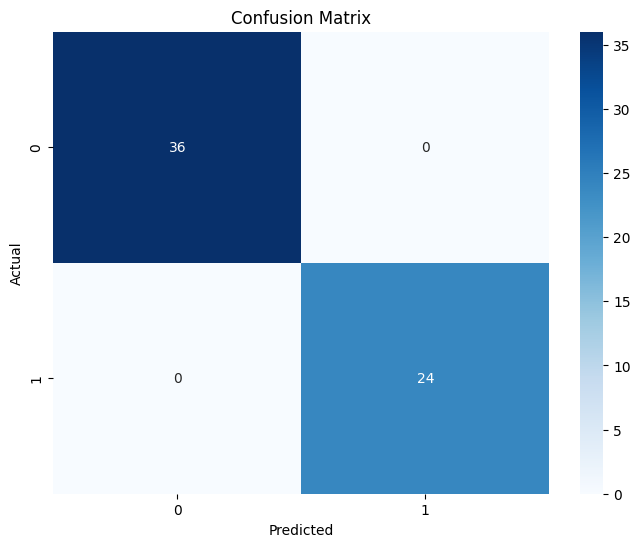

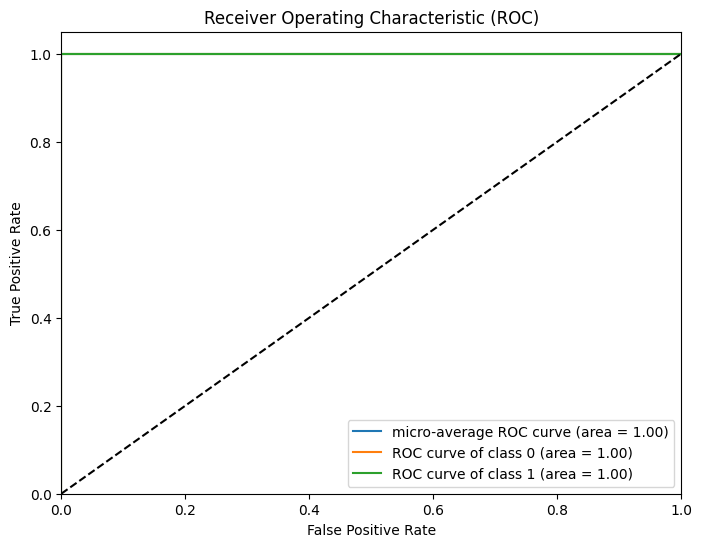

                      Model  Training Accuracy  Testing Accuracy  \
0  Decision Tree Classifier                1.0               1.0   

   Validation Accuracy  CPU times  MSE  Precision  Recall  F1 Score  
0                  1.0   0.044356  0.0        1.0     1.0       1.0  


In [ ]:
# Assume 'target' is the column you want to predict
X = X_new
y = y

# Encode labels if they are not numerical
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define models to be evaluated
models = {
    'Decision Tree Classifier': DecisionTreeClassifier(),
}

# Initialize an empty list to store the results
results_list = []

# Training and evaluating the models
for model_name, model in models.items():
    start_time = time.time()
    model1 = model.fit(X_train, y_train)

    # Training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Testing set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Store results in the list
    results_list.append({
        'Model': model_name,
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'Validation Accuracy': val_accuracy,
        'CPU times': time.time() - start_time,
        'MSE': val_mse,  # Use validation MSE as the overall MSE
        'Precision': train_precision,
        'Recall': train_recall,
        'F1 Score': train_f1
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results_list)

# Display the results
results_df

# Save model to Google Drive
import pickle # import pickle library
model_path = "/content/drive/MyDrive/Spring 2025 Course Deep Learning/11th class/ML_model_1.pkl" # change the extension to pkl

with open(model_path, 'wb') as file: # open the file to save the model
    pickle.dump(model1, file)  # save the model

print("Model saved at:", model_path)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC Curve and AUC for each class
y_test_prob = model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class only
fpr = {}
tpr = {}
roc_auc = {}
num_classes = len(np.unique(y))  # Number of classes in the target

# For each class, calculate ROC curve and AUC
# Assuming binary classification, modify loop as needed for multiclass
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_test_prob)  # Use y_test directly
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_test_prob)  # Use y_test directly
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})')

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print results dataframe
print(results_df)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

#### Model 3 (21,20) Custom FB_ANN. activation= PReLU() + 'sigmoid' + loss='categorical_crossentropy' | Optimizer= Adam | 4th hidden layer

In [ ]:
# Assume 'target' is the column you want to predict
X = X_new
Y = y

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training, validation, and testing sets
X_train, X_interim, y_train, y_interim = train_test_split(X, Y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_interim, y_interim, test_size=0.5, random_state=42)

# One-hot encode the target variables

y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)
y_test = to_categorical(y_test)

# Print shapes of the datasets
print("Shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_validation:", X_validation.shape, "y_validation:", y_validation.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

# Define the combinations of neurons and epochs
combinations = [
    {'neurons': (6, 5, 12, 13), 'epochs': 68},
    {'neurons': (12, 13, 15, 12), 'epochs': 66},
    {'neurons': (5, 14, 14, 5), 'epochs': 31},
    {'neurons': (8, 12, 14, 13), 'epochs': 66},
    {'neurons': (12, 13, 11, 10), 'epochs': 34},
    {'neurons': (15, 10, 9, 7), 'epochs': 47},
    {'neurons': (10, 14, 8, 13), 'epochs': 69},
    {'neurons': (7, 5, 5, 14), 'epochs': 43},
    {'neurons': (10, 12, 7, 14), 'epochs': 49},
    {'neurons': (8, 5, 9, 15), 'epochs': 28},
    {'neurons': (13, 8, 7, 12), 'epochs': 7},
    {'neurons': (9, 6, 10, 10), 'epochs': 30},
]

results = []

for combination in combinations:
    start_time = time.time()


    # Determine the number of unique classes
    num_classes = y_train.shape[1]  # Assuming y_train is one-hot encoded

    # Create and train MLP with ReLU activation for hidden layers and softmax activation for output layer
    model = Sequential()
    model.add(Dense(combination['neurons'][0], input_dim=X_train.shape[1]))
    model.add(PReLU())
    model.add(Dense(combination['neurons'][1]))
    model.add(PReLU())
    model.add(Dense(combination['neurons'][2]))
    model.add(PReLU())
    model.add(Dense(combination['neurons'][3]))
    model.add(PReLU())
    model.add(Dense(num_classes, activation='sigmoid'))  # Softmax activation for multiclass classification
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Use categorical_crossentropy for one-hot encoded targets

    # Print model summary
    model.summary()

    # Train the model
    model2 = model.fit(X_train, y_train, epochs=combination['epochs'], verbose=0)

    # Calculate metrics
    train_preds = model.predict(X_train).argmax(axis=1)
    test_preds = model.predict(X_test).argmax(axis=1)
    val_preds = model.predict(X_validation).argmax(axis=1)

    # Convert one-hot encoded y_train back to single labels for metric calculation
    y_train_labels = y_train.argmax(axis=1)
    y_test_labels = y_test.argmax(axis=1)
    y_val_labels = y_validation.argmax(axis=1)

    accuracy_train = accuracy_score(y_train_labels, train_preds) # Use single label version of y_train
    accuracy_test = accuracy_score(y_test_labels, test_preds)
    accuracy_validation = accuracy_score(y_val_labels, val_preds)

    mse = mean_squared_error(y_test_labels, test_preds)
    precision = precision_score(y_test_labels, test_preds, average='weighted')
    recall = recall_score(y_test_labels, test_preds, average='weighted')
    f1 = f1_score(y_test_labels, test_preds, average='weighted')


    results.append({
        'Combination of Neurons': combination['neurons'],
        'Epochs': combination['epochs'],
        'Training Accuracy': accuracy_train,
        'Testing Accuracy': accuracy_test,
        'Validation Accuracy': accuracy_validation,
        'CPU times': time.time() - start_time,
        'MSE': mse,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
results_df

Shapes:
X_train: (280, 10) y_train: (280, 2)
X_validation: (60, 10) y_validation: (60, 2)
X_test: (60, 10) y_test: (60, 2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu (PReLU)                      │ (None, 6)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_1 (PReLU)                    │ (None, 5)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_2 (PReLU)                    │ (None, 12)                  │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 13)                  │             169 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_3 (PReLU)                    │ (None, 13)                  │              13 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406 (1.59 KB)

 Trainable params: 406 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 12)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_4 (PReLU)                    │ (None, 12)                  │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 13)                  │             169 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_5 (PReLU)                    │ (None, 13)                  │              13 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 15)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_6 (PReLU)                    │ (None, 15)                  │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 12)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_7 (PReLU)                    │ (None, 12)                  │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 781 (3.05 KB)

 Trainable params: 781 (3.05 KB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_8 (PReLU)                    │ (None, 5)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 14)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_9 (PReLU)                    │ (None, 14)                  │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 14)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_10 (PReLU)                   │ (None, 14)                  │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │              75 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_11 (PReLU)                   │ (None, 5)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 474 (1.85 KB)

 Trainable params: 474 (1.85 KB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_12 (PReLU)                   │ (None, 8)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_13 (PReLU)                   │ (None, 12)                  │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 14)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_14 (PReLU)                   │ (None, 14)                  │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 13)                  │             195 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_15 (PReLU)                   │ (None, 13)                  │              13 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 648 (2.53 KB)

 Trainable params: 648 (2.53 KB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 12)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_16 (PReLU)                   │ (None, 12)                  │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 13)                  │             169 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_17 (PReLU)                   │ (None, 13)                  │              13 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 11)                  │             154 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_18 (PReLU)                   │ (None, 11)                  │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_19 (PReLU)                   │ (None, 10)                  │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 643 (2.51 KB)

 Trainable params: 643 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 15)                  │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_20 (PReLU)                   │ (None, 15)                  │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_21 (PReLU)                   │ (None, 10)                  │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 9)                   │              99 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_22 (PReLU)                   │ (None, 9)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 7)                   │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_23 (PReLU)                   │ (None, 7)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 2)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 551 (2.15 KB)

 Trainable params: 551 (2.15 KB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_24 (PReLU)                   │ (None, 10)                  │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 14)                  │             154 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_25 (PReLU)                   │ (None, 14)                  │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 8)                   │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_26 (PReLU)                   │ (None, 8)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 13)                  │             117 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_27 (PReLU)                   │ (None, 13)                  │              13 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 2)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 574 (2.24 KB)

 Trainable params: 574 (2.24 KB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 7)                   │              77 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_28 (PReLU)                   │ (None, 7)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_29 (PReLU)                   │ (None, 5)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_30 (PReLU)                   │ (None, 5)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 14)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_31 (PReLU)                   │ (None, 14)                  │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 2)                   │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 292 (1.14 KB)

 Trainable params: 292 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_32 (PReLU)                   │ (None, 10)                  │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 12)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_33 (PReLU)                   │ (None, 12)                  │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 7)                   │              91 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_34 (PReLU)                   │ (None, 7)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_35 (PReLU)                   │ (None, 14)                  │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 2)                   │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 518 (2.02 KB)

 Trainable params: 518 (2.02 KB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_36 (PReLU)                   │ (None, 8)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_37 (PReLU)                   │ (None, 5)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 9)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_38 (PReLU)                   │ (None, 9)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 15)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_39 (PReLU)                   │ (None, 15)                  │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 2)                   │              32 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406 (1.59 KB)

 Trainable params: 406 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 13)                  │             143 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_40 (PReLU)                   │ (None, 13)                  │              13 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_41 (PReLU)                   │ (None, 8)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 7)                   │              63 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_42 (PReLU)                   │ (None, 7)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 12)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_43 (PReLU)                   │ (None, 12)                  │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 2)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 480 (1.88 KB)

 Trainable params: 480 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                     │ (None, 9)                   │              99 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_44 (PReLU)                   │ (None, 9)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 6)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_45 (PReLU)                   │ (None, 6)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_46 (PReLU)                   │ (None, 10)                  │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_47 (PReLU)                   │ (None, 10)                  │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 396 (1.55 KB)

 Trainable params: 396 (1.55 KB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


,Combination of Neurons,Epochs,Training Accuracy,Testing Accuracy,Validation Accuracy,CPU times,MSE,Precision,Recall,F1 Score
0,"(6, 5, 12, 13)",68,0.985714,1.000000,0.983333,9.735217,0.000000,1.000000,1.000000,1.000000
1,"(12, 13, 15, 12)",66,0.996429,1.000000,1.000000,8.567905,0.000000,1.000000,1.000000,1.000000
2,"(5, 14, 14, 5)",31,0.967857,0.983333,1.000000,7.459095,0.016667,0.984127,0.983333,0.983431
3,"(8, 12, 14, 13)",66,0.996429,1.000000,1.000000,7.968399,0.000000,1.000000,1.000000,1.000000
4,"(12, 13, 11, 10)",34,0.982143,1.000000,1.000000,6.632229,0.000000,1.000000,1.000000,1.000000
5,"(15, 10, 9, 7)",47,0.992857,1.000000,1.000000,6.479870,0.000000,1.000000,1.000000,1.000000
6,"(10, 14, 8, 13)",69,0.985714,1.000000,1.000000,9.491599,0.000000,1.000000,1.000000,1.000000
7,"(7, 5, 5, 14)",43,0.971429,0.933333,1.000000,7.833565,0.066667,0.944444,0.933333,0.934609
8,"(10, 12, 7, 14)",49,0.978571,1.000000,1.000000,6.098658,0.000000,1.000000,1.000000,1.000000
9,"(8, 5, 9, 15)",28,0.971429,0.966667,0.983333,7.344471,0.033333,0.969697,0.966667,0.967033


In [ ]:
# Assume 'target' is the column you want to predict
X = X_new
Y = y

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training, validation, and testing sets
X_train, X_interim, y_train, y_interim = train_test_split(X, Y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_interim, y_interim, test_size=0.5, random_state=42)

# One-hot encode the target variables

y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)
y_test = to_categorical(y_test)

# Print shapes of the datasets
print("Shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_validation:", X_validation.shape, "y_validation:", y_validation.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

# Define the combinations of neurons and epochs
combinations = {'neurons': (10, 12, 7, 14), 'epochs': 49},

results = []

for combination in combinations:
    start_time = time.time()


    # Determine the number of unique classes
    num_classes = y_train.shape[1]  # Assuming y_train is one-hot encoded

    # Create and train MLP with ReLU activation for hidden layers and softmax activation for output layer
    model = Sequential()
    model.add(Dense(combination['neurons'][0], input_dim=X_train.shape[1]))
    model.add(PReLU())
    model.add(Dense(combination['neurons'][1]))
    model.add(PReLU())
    model.add(Dense(combination['neurons'][2]))
    model.add(PReLU())
    model.add(Dense(combination['neurons'][3]))
    model.add(PReLU())
    model.add(Dense(num_classes, activation='sigmoid'))  # Softmax activation for multiclass classification
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Use categorical_crossentropy for one-hot encoded targets

    # Print model summary
    model.summary()

    # Train the model
    model2 = model.fit(X_train, y_train, epochs=combination['epochs'], verbose=0)

    # Calculate metrics
    train_preds = model.predict(X_train).argmax(axis=1)
    test_preds = model.predict(X_test).argmax(axis=1)
    val_preds = model.predict(X_validation).argmax(axis=1)

    # Convert one-hot encoded y_train back to single labels for metric calculation
    y_train_labels = y_train.argmax(axis=1)
    y_test_labels = y_test.argmax(axis=1)
    y_val_labels = y_validation.argmax(axis=1)

    accuracy_train = accuracy_score(y_train_labels, train_preds) # Use single label version of y_train
    accuracy_test = accuracy_score(y_test_labels, test_preds)
    accuracy_validation = accuracy_score(y_val_labels, val_preds)

    mse = mean_squared_error(y_test_labels, test_preds)
    precision = precision_score(y_test_labels, test_preds, average='weighted')
    recall = recall_score(y_test_labels, test_preds, average='weighted')
    f1 = f1_score(y_test_labels, test_preds, average='weighted')


    results.append({
        'Combination of Neurons': combination['neurons'],
        'Epochs': combination['epochs'],
        'Training Accuracy': accuracy_train,
        'Testing Accuracy': accuracy_test,
        'Validation Accuracy': accuracy_validation,
        'CPU times': time.time() - start_time,
        'MSE': mse,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
results_df

model_path = "/content/drive/MyDrive/Spring 2025 Course Deep Learning/11th class/DL_model_1.pkl" # change the extension to pkl

with open(model_path, 'wb') as file: # open the file to save the model
    pickle.dump(model2, file)  # save the model

print("Model saved at:", model_path)

Shapes:
X_train: (280, 10) y_train: (280, 2)
X_validation: (60, 10) y_validation: (60, 2)
X_test: (60, 10) y_test: (60, 2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_60 (PReLU)                   │ (None, 10)                  │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 12)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_61 (PReLU)                   │ (None, 12)                  │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 7)                   │              91 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_62 (PReLU)                   │ (None, 7)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_63 (PReLU)                   │ (None, 14)                  │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 2)                   │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 518 (2.02 KB)

 Trainable params: 518 (2.02 KB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Model saved at: /content/drive/MyDrive/Spring 2025 Course Deep Learning/11th class/DL_model_1.pkl


In [ ]:
results_df

,Combination of Neurons,Epochs,Training Accuracy,Testing Accuracy,Validation Accuracy,CPU times,MSE,Precision,Recall,F1 Score
0,"(10, 12, 7, 14)",49,0.982143,1.0,1.0,11.939126,0.0,1.0,1.0,1.0


Shapes:
X_train: (280, 10) y_train: (280, 2)
X_validation: (60, 10) y_validation: (60, 2)
X_test: (60, 10) y_test: (60, 2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_52 (PReLU)                   │ (None, 10)                  │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 12)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_53 (PReLU)                   │ (None, 12)                  │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 7)                   │              91 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_54 (PReLU)                   │ (None, 7)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_55 (PReLU)                   │ (None, 14)                  │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 2)                   │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 518 (2.02 KB)

 Trainable params: 518 (2.02 KB)

 Non-trainable params: 0 (0.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


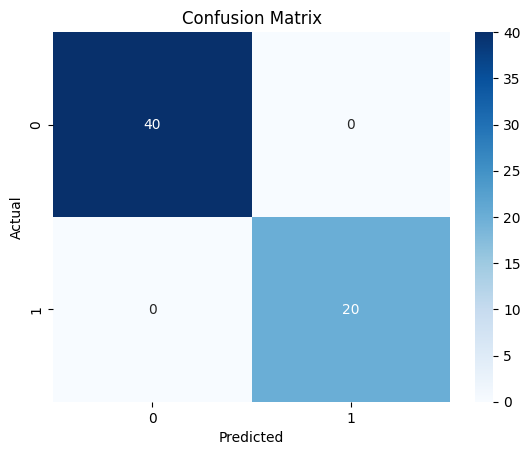

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


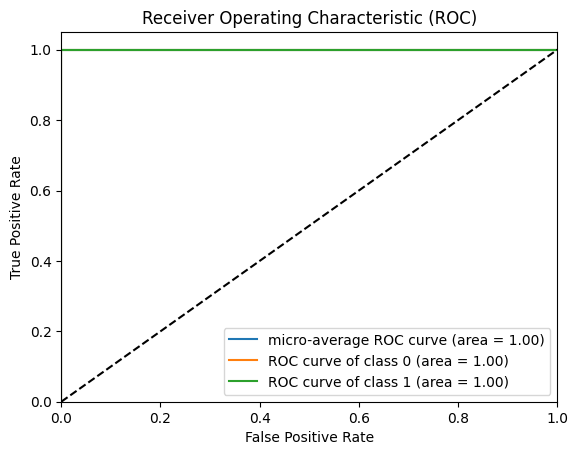

,Combination of Neurons,Epochs,Training Accuracy,Testing Accuracy,Validation Accuracy,CPU Time,MSE,Precision,Recall,F1 Score
0,"(10, 12, 7, 14)",49,0.989286,1.0,1.0,6.904963,0.0,1.0,1.0,1.0


In [ ]:

X = X_new
Y = y

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training, validation, and testing sets
X_train, X_interim, y_train, y_interim = train_test_split(X, Y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_interim, y_interim, test_size=0.5, random_state=42)

# One-hot encode the target variables
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)
y_test = to_categorical(y_test)

# Print shapes of the datasets
print("Shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_validation:", X_validation.shape, "y_validation:", y_validation.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

# Define the combination of neurons and epochs
combination = {'neurons': (10, 12, 7, 14), 'epochs': 49}

results = []

start_time = time.time()

# Determine the number of unique classes
num_classes = y_train.shape[1]  # Assuming y_train is one-hot encoded

# Create and train MLP with ReLU activation for hidden layers and softmax activation for output layer
model = Sequential()
model.add(Dense(combination['neurons'][0], input_dim=X_train.shape[1]))
model.add(PReLU())
model.add(Dense(combination['neurons'][1]))
model.add(PReLU())
model.add(Dense(combination['neurons'][2]))
model.add(PReLU())
model.add(Dense(combination['neurons'][3]))
model.add(PReLU())
model.add(Dense(num_classes, activation='sigmoid'))  # Sigmoid activation for binary classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Use categorical_crossentropy for one-hot encoded targets

# Print model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=combination['epochs'], verbose=0)

# Calculate metrics
train_preds = model.predict(X_train).argmax(axis=1)
test_preds = model.predict(X_test).argmax(axis=1)
val_preds = model.predict(X_validation).argmax(axis=1)

# Convert one-hot encoded y_train back to single labels for metric calculation
y_train_labels = y_train.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)
y_val_labels = y_validation.argmax(axis=1)

accuracy_train = accuracy_score(y_train_labels, train_preds) # Use single label version of y_train
accuracy_test = accuracy_score(y_test_labels, test_preds)
accuracy_validation = accuracy_score(y_val_labels, val_preds)

mse = mean_squared_error(y_test_labels, test_preds)
precision = precision_score(y_test_labels, test_preds, average='weighted')
recall = recall_score(y_test_labels, test_preds, average='weighted')
f1 = f1_score(y_test_labels, test_preds, average='weighted')

results.append({
    'Combination of Neurons': combination['neurons'],
    'Epochs': combination['epochs'],
    'Training Accuracy': accuracy_train,
    'Testing Accuracy': accuracy_test,
    'Validation Accuracy': accuracy_validation,
    'CPU Time': time.time() - start_time,
    'MSE': mse,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

results_df = pd.DataFrame(results)
#print(results_df)

# Confusion Matrix
cm = confusion_matrix(y_test_labels, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
y_test_prob = model.predict(X_test)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_test_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                 ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


results_df